In [1]:
import sys
sys.path.append('/home/raghav/sunbather/src/') #add your path to /sunbather/src/ here

import tools
import RT
import construct_parker as cp
import convergeT_parker as cT
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from p_winds import parker as pw_parker

/home/raghav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/raghav/.local/lib/python3.10/site-packages/p_winds/tools.py:24: UserWarning: Environment variable PWINDS_REFSPEC_DIR is not set.
  warn("Environment variable PWINDS_REFSPEC_DIR is not set.")


**Building fractionated atmosphere without using analytical estimates**

In [2]:
metalfrac2Rp_ab = tools.Abundances()
metalfrac2Rp_ab.set_fractionationprofile(elements='all', exclude_elements=['H', 'He'], proftype='strline', vals=0.1 , frac_intervals=[1.0, 2.0], fraction=True) 

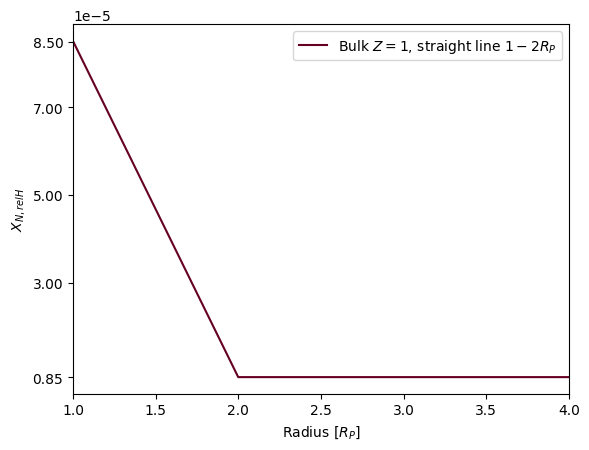

In [3]:
fig, ax = plt.subplots(1)
ax.plot(metalfrac2Rp_ab.abundance_relH.index.values, metalfrac2Rp_ab.abundance_relH['N'], color='xkcd:maroon', label='Bulk $Z=1$, straight line $1-2R_P$')
ax.legend()
ax.set_xlim(1,4)
plt.yticks([8.5e-5, 3e-5, 5e-5, 7e-5, 0.85e-5])
plt.ylabel('$X_{N, relH}$')
plt.xlabel('Radius [$R_P$]')
plt.show()

In [4]:
hj = tools.Planet("hotJupiter")
T = 7000
Mdot = 11.0
pdir = 'metalfrac_2Rp'

In [5]:
cp.save_cloudy_parker_profile(hj,Mdot,T,metalfrac2Rp_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'metalfrac_2Rp','real',overwrite=False,startT='nearby',pdir=pdir,abundances=metalfrac2Rp_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: hotJupiter metalfrac_2Rp 11.000 7000
Simulation already exists and overwrite = False: hotJupiter metalfrac_2Rp 11.000 7000


**Building a simulation using analytical estimates**

Running the necessary non-fractionated simulation first

In [6]:
hj = tools.Planet("hotJupiter")
T = 7000
Mdot = 11.0
pdir = 'solar'
solar_ab = tools.Abundances()

In [7]:
cp.save_cloudy_parker_profile(hj,Mdot,T,solar_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'solar','real',overwrite=False,startT='nearby',pdir=pdir,abundances=solar_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: hotJupiter solar 11.000 7000
Simulation already exists and overwrite = False: hotJupiter solar 11.000 7000


Extracting escape factors using class Fractionation

In [8]:
solar_Mdot11 = tools.Fractionation("/home/raghav/project_sb/sims/1D/hotJupiter/solar/parker_7000_11.000/converged")

In [9]:
Mdot11_fracflux_ratio_dict ={}
for ele in solar_Mdot11.elements:
    Mdot11_fracflux_ratio_dict[ele] = solar_Mdot11.fluxratio_estimate[ele] / solar_Mdot11.abundances.abundance_relH[ele].iloc[0]

This dictionary contains the analytical escape factors of all elements

In [11]:
Mdot11_fracflux_ratio_dict

{'H': 1.0,
 'He': 0.875546883992512,
 'Li': 0.8254472706444558,
 'Be': 0.7673934938162654,
 'B': 0.7175485287683062,
 'C': 0.6836535718972461,
 'N': 0.6288073038144798,
 'O': 0.5721352326756279,
 'F': 0.4912112207587192,
 'Ne': 0.45809594619800326,
 'Na': 0.3810331765135289,
 'Mg': 0.34457471263925665,
 'Al': 0.27090660387212145,
 'Si': 0.24031352982616372,
 'P': 0.16081393330529747,
 'S': 0.130741634622836,
 'Cl': 0.0373159359140917,
 'Ar': 0.0,
 'K': 0.0,
 'Ca': 0.0,
 'Sc': 0.0,
 'Ti': 0.0,
 'V': 0.0,
 'Cr': 0.0,
 'Mn': 0.0,
 'Fe': 0.0,
 'Co': 0.0,
 'Ni': 0.0,
 'Cu': 0.0,
 'Zn': 0.0}

You can now build a fractionated atmosphere using these escape factors, then choosing your own profile shape and intervals

In [14]:
solar_Mdot11_fracestimate_ab = tools.Abundances()
for ele in solar_Mdot11.elements[1:]:
    solar_Mdot11_fracestimate_ab.set_fractionationprofile(elements=ele, proftype='powerlaw', frac_intervals=[1.05, 2.0], vals = Mdot11_fracflux_ratio_dict[ele], fraction=True)

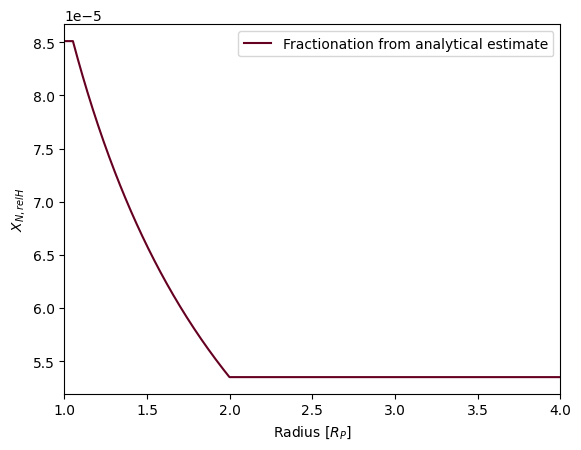

In [15]:
fig, ax = plt.subplots(1)
ax.plot(solar_Mdot11_fracestimate_ab.abundance_relH.index.values, solar_Mdot11_fracestimate_ab.abundance_relH['N'], color='xkcd:maroon', label='Fractionation from analytical estimate')
ax.legend()
ax.set_xlim(1,4)
plt.ylabel('$X_{N, relH}$')
plt.xlabel('Radius [$R_P$]')
plt.show()

In [16]:
pdir = 'example_fracestimate'

In [ ]:
cp.save_cloudy_parker_profile(hj,Mdot,T,solar_Mdot11_fracestimate_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'example_fracestimate','real',overwrite=False,startT='nearby',pdir=pdir,abundances=solar_Mdot11_fracestimate_ab,save_sp=tools.get_specieslist())

mu_bar converged: /home/raghav/project_sb/parker_profiles/hotJupiter/example_fracestimate/pprof_hotJupiter_T=7000_M=11.000.txt
